In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
train=pd.read_csv('D:/kaggle/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

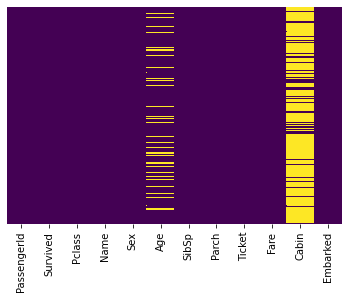

In [3]:
#CHECKING MISSING DATA

sns.heatmap(train.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

# most of null values are in age and cabin column

<AxesSubplot:xlabel='Survived', ylabel='count'>

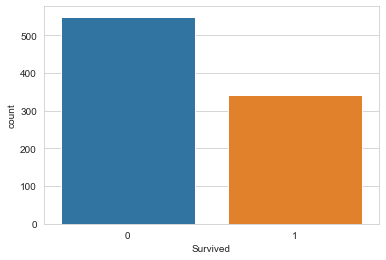

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= train)


<AxesSubplot:xlabel='Survived', ylabel='count'>

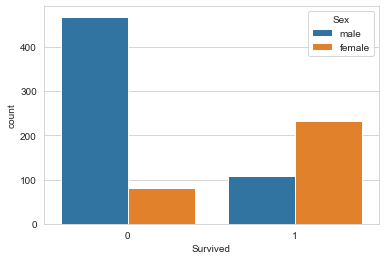

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data= train)

#we can see majorly women survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

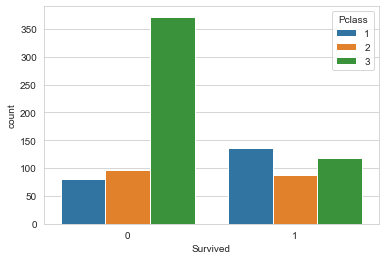

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data= train)

#majorly 3rd class people didn't survived

<AxesSubplot:>

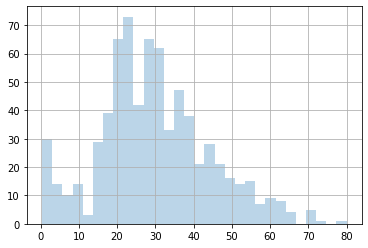

In [4]:
train['Age'].hist(bins=30,alpha=0.3)


<AxesSubplot:>

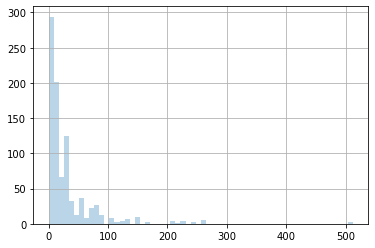

In [8]:
train['Fare'].hist(bins=60,alpha=0.3)

In [10]:
x=train.drop(['Name','Cabin','Ticket','PassengerId','Survived'],axis=1)
y=train['Survived']
x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


In [11]:
getdummies=pd.get_dummies(x)
getdummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [12]:
x_train=getdummies.drop(['Sex_female','Embarked_S'],axis=1)
x_train['Age'].fillna(value=x_train['Age'].mean(),inplace=True)
x_train.head(1)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.25,1,0,0


In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [14]:
# now building logistic regression model
x2=sm.add_constant(x_train)
logit_model=sm.Logit(y,x2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.440392
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 27 Feb 2022   Pseudo R-squ.:                  0.3387
Time:                        19:35:59   Log-Likelihood:                -392.39
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.435e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8727      0.538      9.059      0.000       3.818       5.927
Pclass        -1.1022      0.

In [15]:
x_train.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216
Sex_male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115
Embarked_C,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258
Embarked_Q,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000


In [16]:
# create logistic regression object
Lreg=LogisticRegression(solver='lbfgs',max_iter=1000)

#perform logistic regression
Lreg.fit(x_train,y.ravel())   #ravel() will return the ID array with all the input array elements

LogisticRegression(max_iter=1000)

In [17]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train

array([0.09309034, 0.91526948, 0.62372883, 0.88750647, 0.07861699,
       0.12974956, 0.27394676, 0.10061832, 0.57522518, 0.89613234,
       0.72593038, 0.80750905, 0.13226558, 0.03530627, 0.72500421,
       0.61398369, 0.10556893, 0.23457268, 0.50445429, 0.67943287,
       0.20437076, 0.20602884, 0.78301081, 0.49878131, 0.54893794,
       0.34299331, 0.13381125, 0.43115276, 0.67137138, 0.09478313,
       0.47608645, 0.94613252, 0.67130886, 0.06963532, 0.54279345,
       0.30438594, 0.13381232, 0.12788891, 0.55091985, 0.74095762,
       0.41362257, 0.77588419, 0.13398188, 0.91946826, 0.75551509,
       0.09481216, 0.09939083, 0.67130886, 0.07809383, 0.62720183,
       0.0654221 , 0.12782777, 0.87720209, 0.76412791, 0.25485432,
       0.48235777, 0.85410626, 0.13928031, 0.87402959, 0.039177  ,
       0.17223717, 0.91090717, 0.29452579, 0.08802075, 0.57510746,
       0.09520798, 0.81118517, 0.13679658, 0.35843731, 0.06040484,
       0.2180353 , 0.31555706, 0.328831  , 0.11660168, 0.09630

In [18]:
##splitting the data set

from sklearn.model_selection import train_test_split
x1_train, x1_val,y1_train, y1_val= train_test_split(x_train,y,test_size=0.20,random_state=42)
len(x1_train),len(x1_val),len(y1_train),len(y1_val)

(712, 179, 712, 179)

In [19]:
# create logistic regression object
Lreg=LogisticRegression(solver='lbfgs',max_iter=1000)

#perform logistic regression
Lreg.fit(x1_train,y1_train.ravel())   #ravel() will return the ID array with all the input array elements

LogisticRegression(max_iter=1000)

In [21]:
y_predict_val= Lreg.predict(x1_val)
y_predict_val

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [22]:
y_predict_train=Lreg.predict(x1_train)
y_predict_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [23]:
# train dataset probability
y_prob_train=Lreg.predict_proba(x1_train)[:,1]
y_prob_train

array([0.32901332, 0.27205958, 0.09826698, 0.08892073, 0.45866694,
       0.69373905, 0.33138653, 0.26510292, 0.10483802, 0.45024798,
       0.73373706, 0.06232575, 0.21425524, 0.11437351, 0.10730105,
       0.66459916, 0.88770688, 0.95406816, 0.20932982, 0.92744465,
       0.42008491, 0.04189263, 0.60856954, 0.872164  , 0.3564816 ,
       0.19328506, 0.66259951, 0.107297  , 0.33066277, 0.15258289,
       0.05838785, 0.6272301 , 0.10380396, 0.91638184, 0.13226679,
       0.37446976, 0.09539902, 0.76484587, 0.37748034, 0.81266641,
       0.10468455, 0.10483802, 0.82889815, 0.10369442, 0.44711403,
       0.11926095, 0.79537382, 0.12963094, 0.61639219, 0.78795567,
       0.63756385, 0.16702906, 0.9445085 , 0.13227406, 0.70278113,
       0.10502048, 0.6659219 , 0.81668756, 0.69432248, 0.94825055,
       0.14337392, 0.13832719, 0.67884622, 0.15022809, 0.68020893,
       0.13178334, 0.11034047, 0.1048747 , 0.12624026, 0.12955354,
       0.28673142, 0.61086833, 0.16820557, 0.13227406, 0.18369

In [24]:
y_prob_val=Lreg.predict_proba(x1_val)[:,1]
y_prob_val

array([0.10691692, 0.22421399, 0.13699029, 0.8890113 , 0.74358148,
       0.93210572, 0.67092669, 0.09229916, 0.75800064, 0.92284794,
       0.33580713, 0.06962731, 0.37446976, 0.14902816, 0.19914358,
       0.93825197, 0.30150678, 0.67097099, 0.24795113, 0.33178571,
       0.12282334, 0.4116499 , 0.61913889, 0.13738019, 0.10641889,
       0.0694686 , 0.46785318, 0.22531778, 0.08265384, 0.60058719,
       0.14072916, 0.6659078 , 0.55023808, 0.61014337, 0.14461045,
       0.12696886, 0.46346186, 0.67092669, 0.94193385, 0.10483802,
       0.20351351, 0.08143843, 0.1048747 , 0.13227406, 0.57133605,
       0.09260176, 0.14080961, 0.12661223, 0.12259263, 0.33177545,
       0.7225064 , 0.80714468, 0.0405854 , 0.51958575, 0.04799692,
       0.93390323, 0.2188093 , 0.93061162, 0.77787706, 0.74039986,
       0.13328288, 0.86141282, 0.76625333, 0.44425013, 0.13227406,
       0.63115815, 0.31686565, 0.10690728, 0.1486899 , 0.87196483,
       0.75730395, 0.94923569, 0.57830293, 0.90258568, 0.12622

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y1_val,y_predict_val)
score

0.8100558659217877

In [26]:
confusion_matrix(y1_val,y_predict_val)

array([[90, 15],
       [19, 55]], dtype=int64)

In [28]:
test=pd.read_csv('D:/kaggle/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
x_test=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [30]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [31]:
getdummies_test=pd.get_dummies(x_test)
getdummies_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,1,0,0,1


In [32]:
x_test_d=getdummies_test.drop(['Sex_female','Embarked_S'],axis=1)
x_test_d['Age'].fillna(value=x_test_d['Age'].mean(),inplace=True)
x_test_d['Fare'].fillna(value=x_test_d['Fare'].mean(),inplace=True)

x_test_d

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,34.50000,0,0,7.8292,1,0,1
1,3,47.00000,1,0,7.0000,0,0,0
2,2,62.00000,0,0,9.6875,1,0,1
3,3,27.00000,0,0,8.6625,1,0,0
4,3,22.00000,1,1,12.2875,0,0,0
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0
414,1,39.00000,0,0,108.9000,0,1,0
415,3,38.50000,0,0,7.2500,1,0,0
416,3,30.27259,0,0,8.0500,1,0,0


In [34]:
# after giving x_test as input we are getting predicted value of surviving people
y_predict_test= Lreg.predict(x_test_d)
y_predict_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
# test dataset probability
y_prob_test=Lreg.predict_proba(x_test_d)[:,1]
y_prob_test

array([0.11595838, 0.40278596, 0.12444367, 0.11324177, 0.57226388,
       0.1612219 , 0.66877343, 0.19033686, 0.77333879, 0.08113603,
       0.10316313, 0.32417358, 0.91864283, 0.07564078, 0.83457101,
       0.84947399, 0.25011443, 0.18844319, 0.55856278, 0.59411242,
       0.30644984, 0.16523294, 0.91420273, 0.60826613, 0.89791808,
       0.04469051, 0.95273589, 0.18135827, 0.3620355 , 0.0902631 ,
       0.10952055, 0.17294056, 0.46389186, 0.48702424, 0.49065652,
       0.20072168, 0.60616199, 0.67335292, 0.11991457, 0.11512614,
       0.10710622, 0.4402072 , 0.07593488, 0.80055728, 0.84013295,
       0.11949403, 0.43033995, 0.13022461, 0.87662261, 0.51189105,
       0.43607809, 0.33382336, 0.73502685, 0.87045769, 0.31171106,
       0.07488631, 0.09023794, 0.11942074, 0.08017983, 0.96024937,
       0.14848146, 0.22011143, 0.14451645, 0.72184432, 0.62053005,
       0.8024231 , 0.74637867, 0.32641498, 0.53876963, 0.78147655,
       0.70909775, 0.13331825, 0.61556776, 0.55766187, 0.95635